   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal

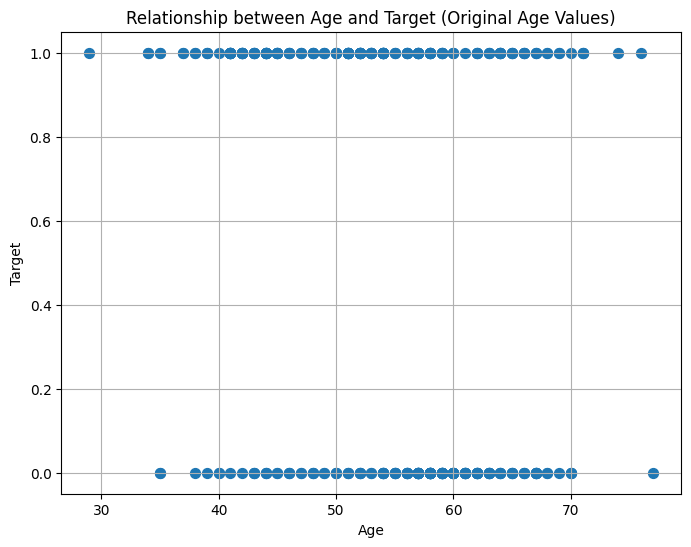

        age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.952197    1   3  0.763956 -0.256334    1        0  0.015443      0   
1 -1.915313    1   2 -0.092738  0.072199    0        1  1.633471      0   
2 -1.474158    0   1 -0.092738 -0.816773    0        0  0.977514      0   
3  0.180175    1   1 -0.663867 -0.198357    0        1  1.239897      0   
4  0.290464    0   0 -0.663867  2.082050    0        1  0.583939      1   

    oldpeak  slope        ca  thal  target  
0  1.087338      0 -0.714429     1       1  
1  2.122573      0 -0.714429     2       1  
2  0.310912      2 -0.714429     2       1  
3 -0.206705      2 -0.714429     2       1  
4 -0.379244      2 -0.714429     2       1  
Naive Bayes Accuracy: 0.8688524590163934
Random Forest Accuracy: 0.8360655737704918
Naive Bayes predicted 0: 31 times
Random Forest predicted 0: 29 times
Naive Bayes predicted 1: 30 times
Random Forest predicted 1: 32 times


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df=pd.read_csv('/content/heart.csv')
print(df.head())

# Check for missing values
print(df.isnull().sum())

#dropping the null values
df.dropna(inplace=True)

# Check for missing values after dropping
print(df.isnull().sum())
# Create a copy of the original DataFrame
original_df = df.copy()

# ... (Your existing code for scaling and model training) ...

# Plotting with original age values
plt.figure(figsize=(8, 6))
plt.scatter(original_df['age'], original_df['target'], marker='o', s=50)
plt.xlabel('Age')
plt.ylabel('Target')
plt.title('Relationship between Age and Target (Original Age Values)')
plt.grid(True)
plt.show()


# Standardizing numerical variables
scaler = StandardScaler()
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

print(df.head())


# Define features (X input ) and target (y output)
X = df.drop(columns=['target'])  # Drop the target column to get features
y = df['target']  # The target variable

# Split the dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions with both models
nb_predictions = nb_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)


# Evaluate the models' performance
nb_accuracy = accuracy_score(y_test, nb_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f'Naive Bayes Accuracy: {nb_accuracy}')
print(f'Random Forest Accuracy: {rf_accuracy}')

# Count the number of 1s in the predictions
nb_count = np.count_nonzero(nb_predictions == 1)
rf_count = np.count_nonzero(rf_predictions == 1)
nb_count0 = np.count_nonzero(nb_predictions == 0)
rf_count0 = np.count_nonzero(rf_predictions == 0)
print(f'Naive Bayes predicted 0: {nb_count0} times')
print(f'Random Forest predicted 0: {rf_count0} times')
print(f'Naive Bayes predicted 1: {nb_count} times')
print(f'Random Forest predicted 1: {rf_count} times')



[[26  3]
 [ 5 27]]


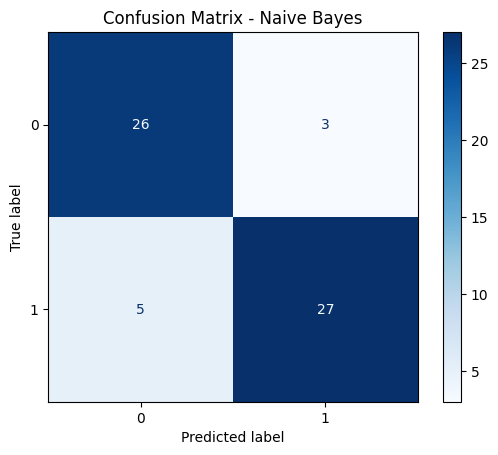

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Generate the confusion matrix
cm = confusion_matrix(y_test, nb_predictions)
print(cm)

# Create the ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_model.classes_)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

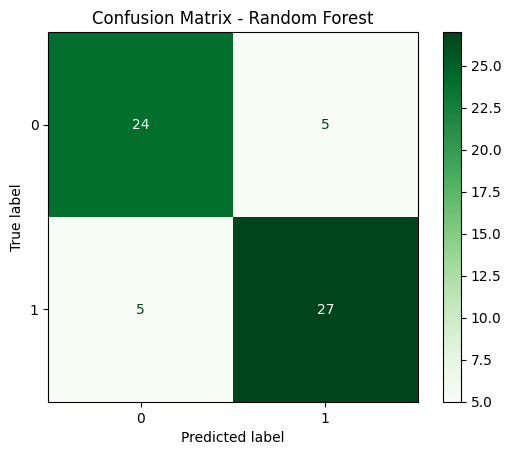

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt



# Generate the confusion matrix
cm = confusion_matrix(y_test, rf_predictions)

# Create the ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Greens)  # Using a different colormap for distinction
plt.title('Confusion Matrix - Random Forest')
plt.show()

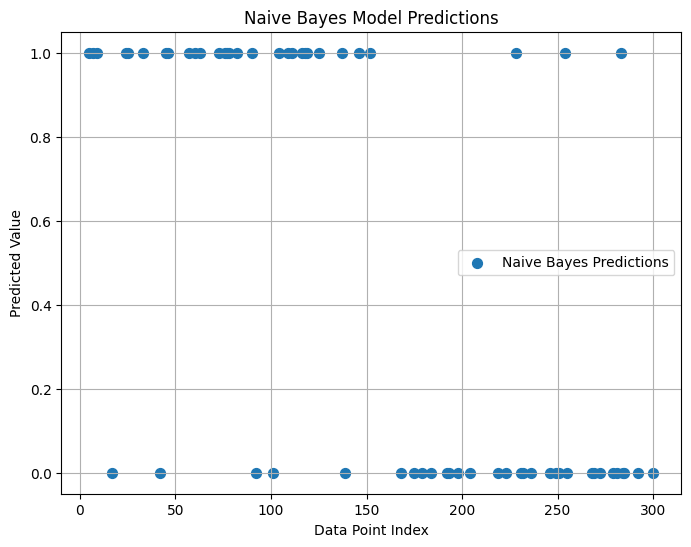

In [ ]:


import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))

# Plot the predictions
plt.scatter(X_test.index, nb_predictions, label='Naive Bayes Predictions', marker='o', s=50)


# Add labels and title
plt.xlabel('Data Point Index')
plt.ylabel('Predicted Value')
plt.title('Naive Bayes Model Predictions')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

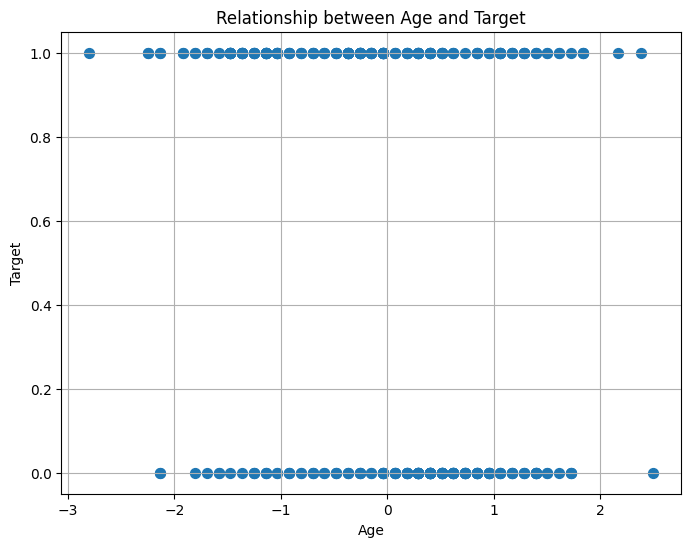

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['target'], marker='o', s=50)
plt.xlabel('Age')
plt.ylabel('Target')
plt.title('Relationship between Age and Target')
plt.grid(True)
plt.show()

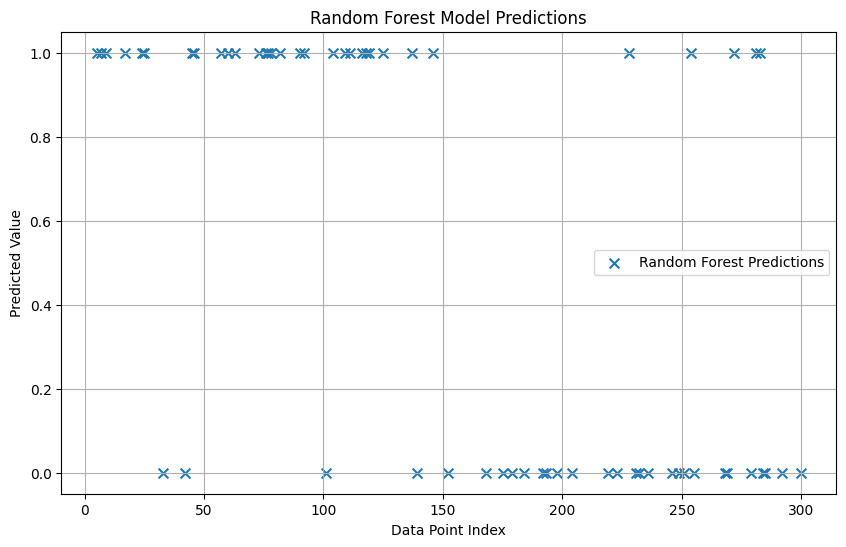

In [ ]:



plt.figure(figsize=(10, 6))

# Plot the predictions
plt.scatter(X_test.index, rf_predictions, label='Random Forest Predictions', marker='x', s=50)


# Add labels and title
plt.xlabel('Data Point Index')
plt.ylabel('Predicted Value')
plt.title('Random Forest Model Predictions')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

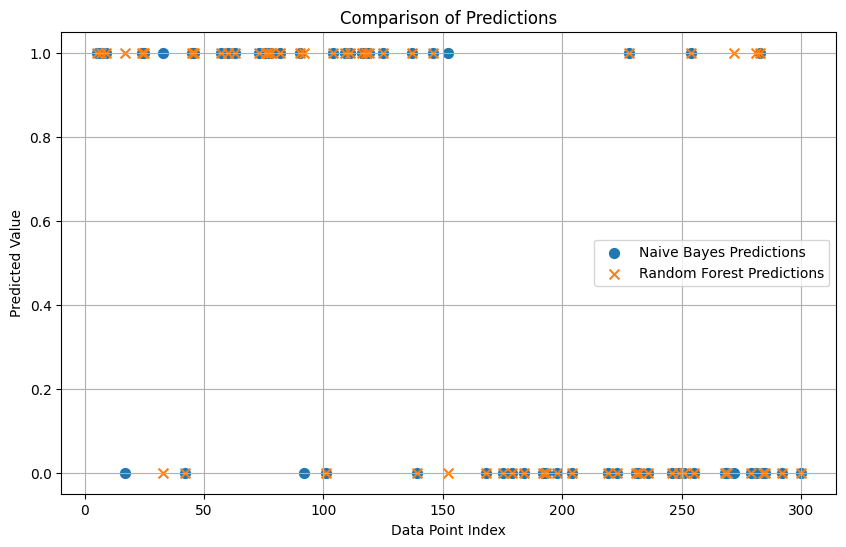

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test.index, nb_predictions, label='Naive Bayes Predictions', marker='o', s=50)
plt.scatter(X_test.index, rf_predictions, label='Random Forest Predictions', marker='x', s=50)
plt.xlabel('Data Point Index')
plt.ylabel('Predicted Value')
plt.title('Comparison of Predictions')
plt.legend()
plt.grid(True)
plt.show()

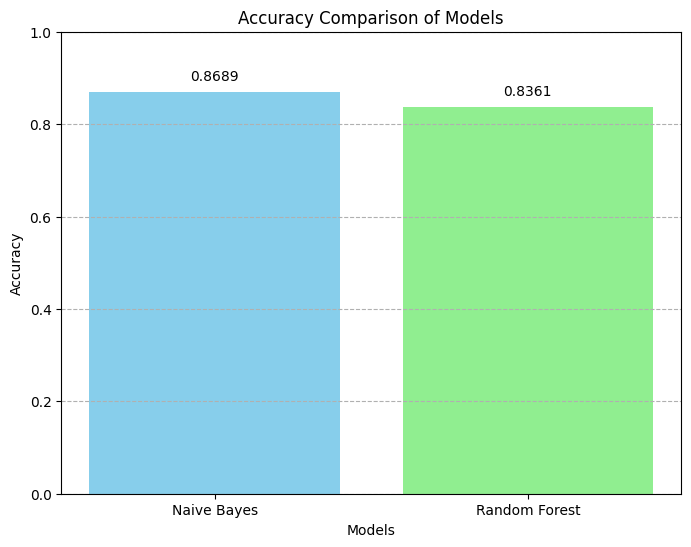

In [ ]:


import matplotlib.pyplot as plt


models = ['Naive Bayes', 'Random Forest']
accuracy_scores = [nb_accuracy, rf_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_scores, color=['skyblue', 'lightgreen'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Models')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy
plt.grid(axis='y', linestyle='--')

for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.02, f'{v:.4f}', ha='center', va='bottom') #display values on top of bars


plt.show()